<h1>Data Cleaning and Exploratory Data Analysis (EDA)</h1>

In [2]:
import numpy as np
import pandas as pd
# import matplotlib.pyplot as 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv(r"C:\Users\Huleb\Downloads\Customers.csv")

In [4]:
x = data[['Unnamed: 5', 'Unnamed: 6', 'Unnamed: 8', 'Unnamed: 18', 'Unnamed: 17']]

In [5]:
data.drop(x, axis = 1, inplace = True)

In [6]:
data.rename(columns ={'Unnamed: 4':'FullName'}, inplace = True)

In [7]:
data['TotalChildren'] = data['TotalChildren'].astype(int)

In [8]:
data['BirthDate'] = pd.to_datetime(data['BirthDate'], format = 'mixed')
#passing format='ISO8601' if your strings are all ISO8601 but not necessarily in exactly the same format;
#passing format='mixed'
#passing format='%d%m%y'

In [9]:
data['BirthDate.1']= pd.to_datetime(data['BirthDate.1'], format = 'mixed')

In [10]:
data['AnnualIncome'] = data['AnnualIncome'].str.strip('$').str.replace(',', '').astype(int)
#data['AnnualIncome'].replace({'$':'', ' ': ''})

In [11]:
data['AvgTotalChildren'] = data['TotalChildren'].mean().astype(int)

In [12]:
data.ffill(inplace = True)

In [13]:
data.isna().sum()

CustomerKey         0
Prefix              0
FirstName           0
LastName            0
FullName            0
BirthDate           0
MaritalStatus       0
Gender              0
EmailAddress        0
AnnualIncome        0
TotalChildren       0
EducationLevel      0
Occupation          0
HomeOwner           0
BirthDate.1         0
AvgTotalChildren    0
dtype: int64

In [14]:
data.MaritalStatus = data.MaritalStatus.replace({'S':'Single','M':'Married'})

In [15]:
data.Gender = data.Gender.replace({'F':'Female','M':'Male'})

In [16]:
data['Gender'] = data['Gender'].ffill()

In [17]:
data['AvgTotalChildren'] = data['TotalChildren'].mean().astype(int)

In [18]:
data['AvgAnnualIncome'] = data['AnnualIncome'].mean()

In [20]:
data['Age'] = (pd.to_datetime("today")).year - (data['BirthDate']).dt.year

In [21]:
data['BirthMonth'] = data['BirthDate'].dt.month.apply(lambda x: 'January' if (x == 1) else ('February' if (x == 2) else ('March' if (x == 3) else ('April' if (x == 4) else  ('May' if (x == 5) else ('June' if (x == 6) else ('July' if (x == 7) else ('August' if (x == 8) else ('September' if (x == 9) else ('October' 
                                                                                                                         if (x == 10) else ('November' if (x == 11) else ('December' if (x == 12) else 'Out of range'))))))))))))

In [22]:
data['HomeOwner'] = data['HomeOwner'].replace({'Y':'Yes','N':'No'})

In [48]:
data.drop('BirthDate.1', axis = 1, inplace = True)

In [49]:
data

,CustomerKey,Prefix,FirstName,LastName,FullName,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner,AvgTotalChildren,AvgAnnualIncome,Age,BirthMonth
0,11000,MR.,JON,YANG,MR. JON YANG,1966-04-08,Married,Male,jon24@learnsector.com,90000,2,Bachelors,Professional,Yes,1,57269.120564,58,April
1,11001,MR.,EUGENE,HUANG,MR. EUGENE HUANG,1965-05-14,Single,Male,eugene10@learnsector.com,60000,3,Bachelors,Professional,No,1,57269.120564,59,May
2,11002,MR.,RUBEN,TORRES,MR. RUBEN TORRES,1965-08-12,Married,Male,ruben35@learnsector.com,60000,3,Bachelors,Professional,Yes,1,57269.120564,59,August
3,11003,MS.,CHRISTY,ZHU,MS. CHRISTY ZHU,1968-02-15,Single,Female,christy12@learnsector.com,70000,0,Bachelors,Professional,No,1,57269.120564,56,February
4,11004,MRS.,ELIZABETH,JOHNSON,MRS. ELIZABETH JOHNSON,1968-08-08,Single,Female,elizabeth5@learnsector.com,80000,5,Bachelors,Professional,Yes,1,57269.120564,56,August
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18143,29479,MR.,TOMMY,TANG,MR. TOMMY TANG,1958-07-04,Married,Male,tommy2@learnsector.com,30000,1,Graduate Degree,Clerical,Yes,1,57269.120564,66,July
18144,29480,MRS.,NINA,RAJI,MRS. NINA RAJI,1960-11-10,Single,Female,nina21@learnsector.com,30000,3,Graduate Degree,Clerical,Yes,1,57269.120564,64,November
18145,29481,MR.,IVAN,SURI,MR. IVAN SURI,1960-01-05,Single,Male,ivan0@learnsector.com,30000,3,Graduate Degree,Clerical,No,1,57269.120564,64,January
18146,29482,MR.,CLAYTON,ZHANG,MR. CLAYTON ZHANG,1959-03-05,Married,Male,clayton0@learnsector.com,30000,3,Bachelors,Clerical,Yes,1,57269.120564,65,March


<h2>Exploratory Data Analysis</h2>

1. Create a bar chart showing the count of customers by MaritalStatus.

In [158]:
data.MaritalStatus.value_counts().reset_index()

,MaritalStatus,count
0,Married,9817
1,Single,8331


Text(0.5, 0, 'Marital Status')

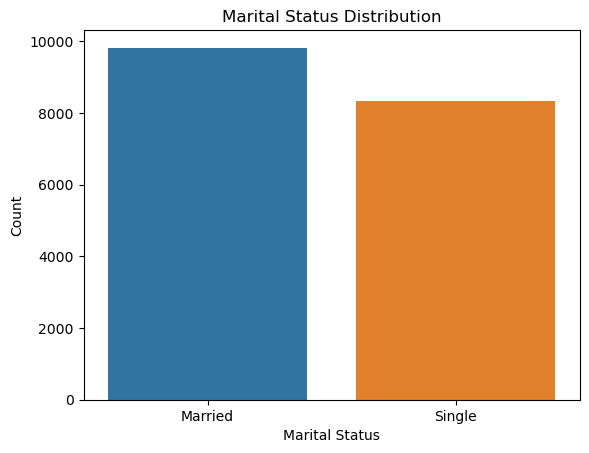

In [162]:
sns.countplot(x = 'MaritalStatus', data = data)
plt.title('Marital Status Distribution')
plt.ylabel('Count')
plt.xlabel('Marital Status')

2. Visualize the proportion of customers by Gender using a pie chart.


In [163]:
data['Gender'].value_counts().reset_index()

,Gender,count
0,Male,9189
1,Female,8959


Text(0.5, 1.0, 'Gender Distribution')

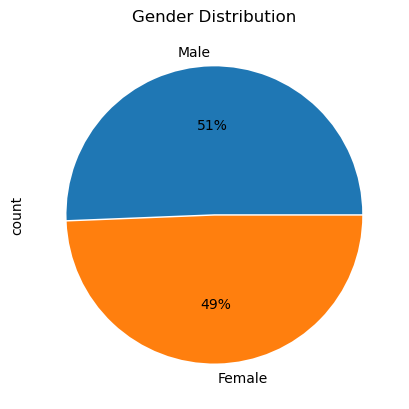

In [186]:
data.Gender.value_counts().plot(kind = 'pie', autopct='%.0f%%', explode = target)
target = [0, 0.01]
plt.title('Gender Distribution')

3. Generate a histogram of AnnualIncome to examine its distribution (Note: Convert AnnualIncome to a numeric format first)

In [174]:
data.AnnualIncome.value_counts().reset_index()

,AnnualIncome,count
0,60000,3072
1,40000,2688
2,70000,2313
3,30000,2236
4,20000,1745
5,80000,1325
6,10000,1135
7,90000,830
8,50000,661
9,100000,559


C:\Users\Huleb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Number of Customers')

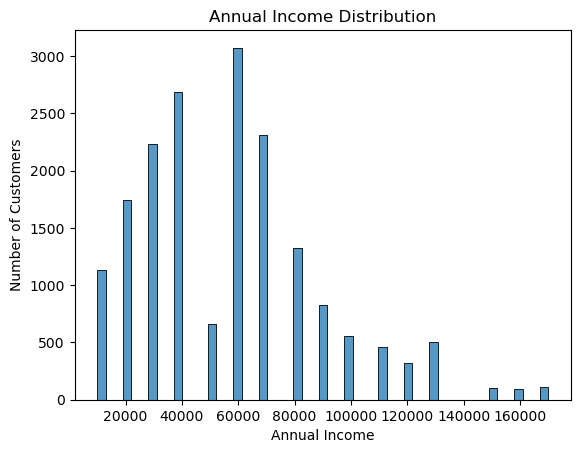

In [23]:
sns.histplot(x = 'AnnualIncome', data=data)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Number of Customers')

4. Create a column chart displaying the average number of TotalChildren for each EducationLevel

In [175]:
data.groupby(['AvgTotalChildren','EducationLevel']).size().reset_index()

,AvgTotalChildren,EducationLevel,0
0,1,Bachelors,5261
1,1,Graduate Degree,3125
2,1,High School,3241
3,1,Partial College,4966
4,1,Partial High School,1555


Text(0, 0.5, 'Number of Customers')

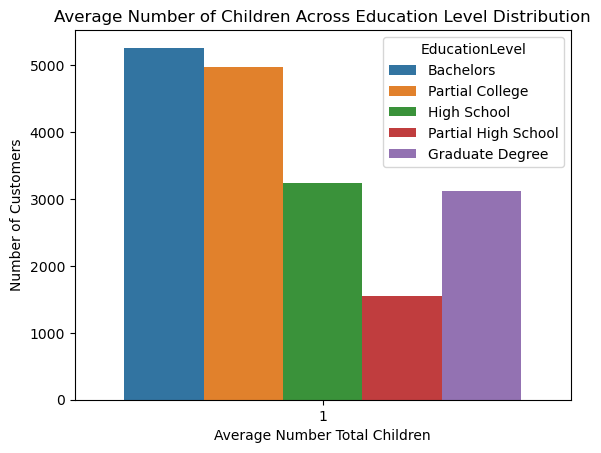

In [24]:
sns.countplot(x = 'AvgTotalChildren', hue ='EducationLevel', data = data)
plt.title('Average Number of Children Across Education Level Distribution')
plt.xlabel('Average Number Total Children')
plt.ylabel('Number of Customers')

5. Use a bar chart to compare the average AnnualIncome across different Occupation categories.

In [178]:
data.groupby(['AvgAnnualIncome', 'Occupation']).size().reset_index()

,AvgAnnualIncome,Occupation,0
0,57269.120564,Clerical,2859
1,57269.120564,Management,3011
2,57269.120564,Manual,2353
3,57269.120564,Professional,5424
4,57269.120564,Skilled Manual,4501


Text(0, 0.5, 'Number of Customers')

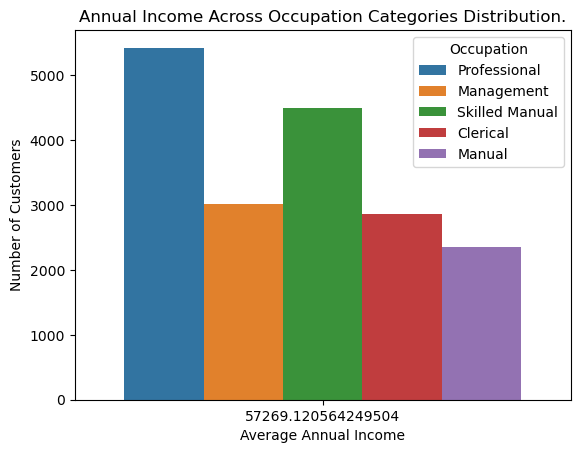

In [25]:
sns.countplot(x= 'AvgAnnualIncome', hue = 'Occupation', data=data)
plt.title('Annual Income Across Occupation Categories Distribution.')
plt.xlabel('Average Annual Income')
plt.ylabel('Number of Customers')

6. Visualize the count of customers in each Occupation category using a pie chart.

In [188]:
data.Occupation.value_counts().reset_index()

,Occupation,count
0,Professional,5424
1,Skilled Manual,4501
2,Management,3011
3,Clerical,2859
4,Manual,2353


Text(0, 0.5, ' ')

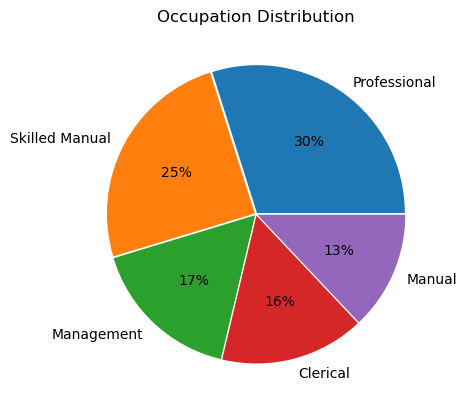

In [29]:
data.Occupation.value_counts().plot(kind = 'pie', autopct='%.0f%%', explode = [0.01,0.01,0.01,0.01,0.01,])
plt.title('Occupation Distribution')
plt.ylabel(' ')

7. Generate a histogram to explore the age distribution of customers (Age needs to be derived from BirthDate)

In [194]:
data.Age.value_counts().reset_index()

,Age,count
0,59,666
1,56,661
2,57,643
3,58,634
4,55,633
...,...,...
65,112,2
66,101,2
67,114,1
68,107,1


C:\Users\Huleb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Number of Customers')

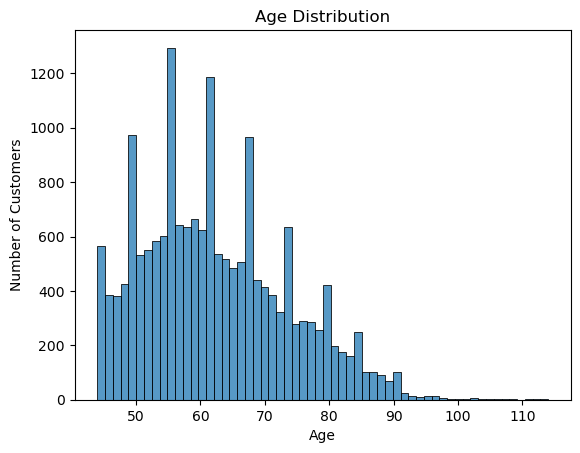

In [30]:
sns.histplot(x = 'Age', data=data)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Customers')

8. Plot a line chart to show changes in the average AnnualIncome over different age groups.

In [216]:
data.groupby(['AvgAnnualIncome', 'Age']).size().reset_index()

,AvgAnnualIncome,Age,0
0,57269.120564,44,253
1,57269.120564,45,313
2,57269.120564,46,384
3,57269.120564,47,380
4,57269.120564,48,426
...,...,...,...
65,57269.120564,109,1
66,57269.120564,111,3
67,57269.120564,112,2
68,57269.120564,113,2


C:\Users\Huleb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Huleb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Average Annual Income')

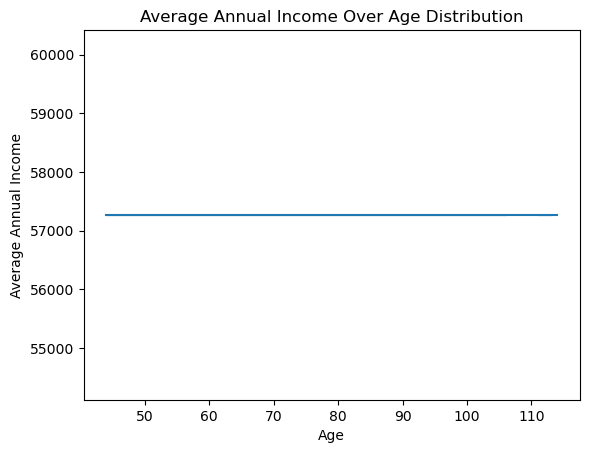

In [215]:
sns.lineplot(data = data, x = 'Age', y = 'AvgAnnualIncome')
plt.title('Average Annual Income Over Age Distribution')
plt.xlabel('Age')
plt.ylabel('Average Annual Income')

9. Create a bar chart that shows the number of homeowners vs. non-homeowners (HomeOwner status).

In [222]:
data.HomeOwner.value_counts().reset_index()

,HomeOwner,count
0,Y,12260
1,N,5888


Text(0, 0.5, 'Number of Customers')

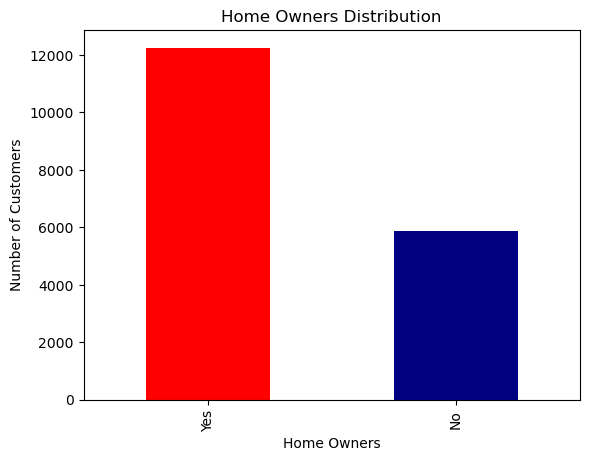

In [31]:
data.HomeOwner.value_counts().plot(kind = 'bar', color = ['red', 'navy'])
plt.title('Home Owners Distribution')
plt.xlabel('Home Owners')
plt.ylabel('Number of Customers')

In [239]:
data.EducationLevel.value_counts().reset_index()

,EducationLevel,count
0,Bachelors,5261
1,Partial College,4966
2,High School,3241
3,Graduate Degree,3125
4,Partial High School,1555


10. Use a column chart to display the total number of customers by EducationLevel.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Bachelors'),
  Text(1, 0, 'Partial College'),
  Text(2, 0, 'High School'),
  Text(3, 0, 'Partial High School'),
  Text(4, 0, 'Graduate Degree')])

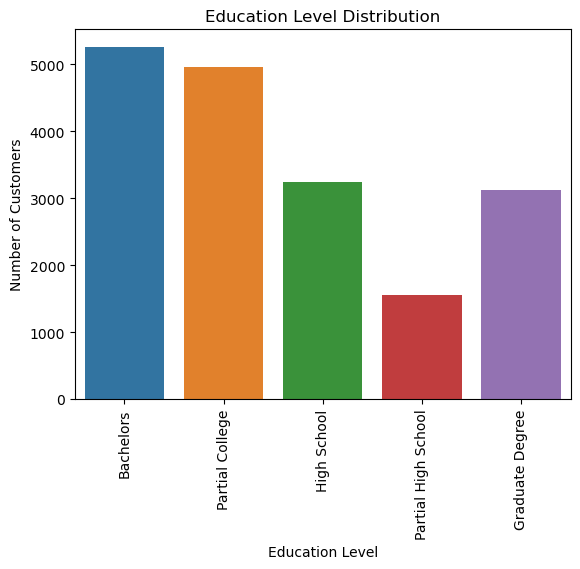

In [32]:
sns.countplot(x = 'EducationLevel', data = data)
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Number of Customers')
plt.xticks(rotation=90)

11. Visualize the distribution of TotalChildren using a histogram.


In [251]:
data.TotalChildren.value_counts().reset_index()

,TotalChildren,count
0,0,5080
1,2,3703
2,1,3552
3,4,2259
4,3,2153
5,5,1401


C:\Users\Huleb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Number of Customers')

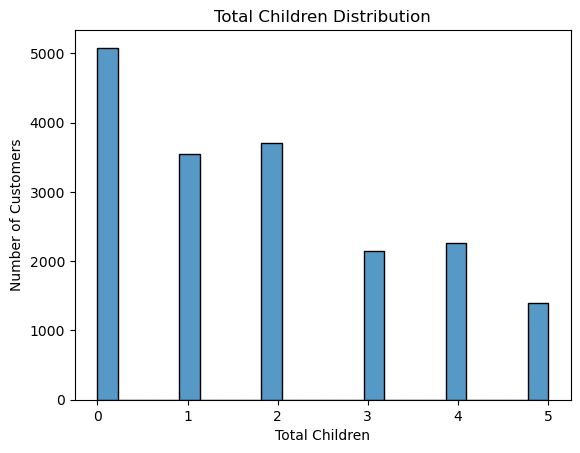

In [33]:
sns.histplot(x = 'TotalChildren', data = data)
plt.title('Total Children Distribution')
plt.xlabel('Total Children')
plt.ylabel('Number of Customers')

12. 
Create a pie chart showing the proportion of different MaritalStatus categories within a specific Occupation.

In [258]:
data.groupby(['MaritalStatus', 'Occupation']).size().reset_index()

,MaritalStatus,Occupation,0
0,Married,Clerical,1407
1,Married,Management,1888
2,Married,Manual,791
3,Married,Professional,3062
4,Married,Skilled Manual,2669
5,Single,Clerical,1452
6,Single,Management,1123
7,Single,Manual,1562
8,Single,Professional,2362
9,Single,Skilled Manual,1832


Text(0.5, 1.0, 'MaritalStatus Across Occupation Distribution')

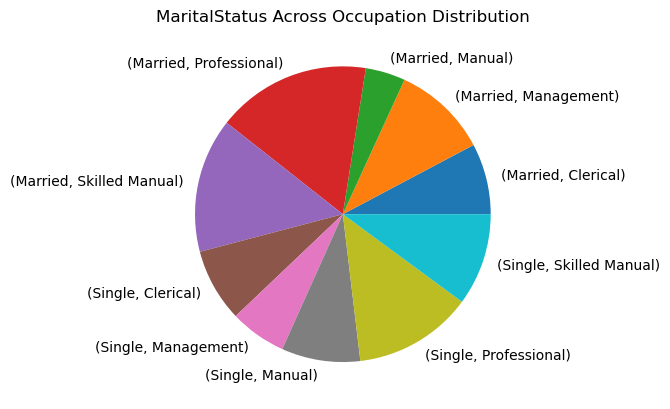

In [38]:
data.groupby(['MaritalStatus', 'Occupation']).size().plot(kind='pie')
plt.title('MaritalStatus Across Occupation Distribution')


Text(0.5, 1.0, 'MaritalStatus Across Occupation Distribution')

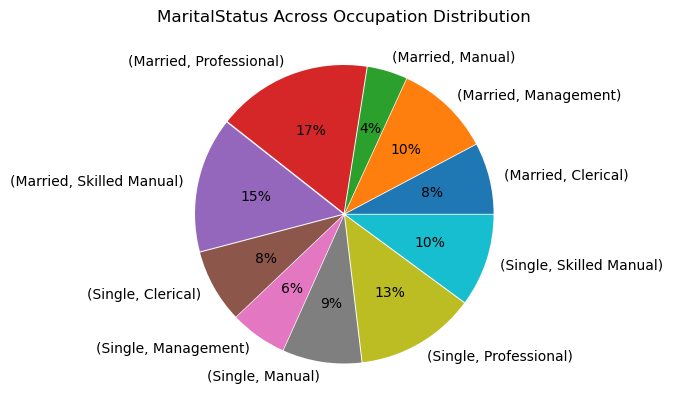

In [41]:
data.groupby(['MaritalStatus', 'Occupation']).size().plot(kind='pie',autopct='%.0f%%', explode = [0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,])
plt.title('MaritalStatus Across Occupation Distribution')

13. Plot a bar chart comparing the count of male vs. female customers in each EducationLevel.

In [266]:
data.groupby(['Gender', 'EducationLevel']).size().reset_index()

,Gender,EducationLevel,0
0,Female,Bachelors,2584
1,Female,Graduate Degree,1581
2,Female,High School,1563
3,Female,Partial College,2482
4,Female,Partial High School,749
5,Male,Bachelors,2677
6,Male,Graduate Degree,1544
7,Male,High School,1678
8,Male,Partial College,2484
9,Male,Partial High School,806


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Bachelors'),
  Text(1, 0, 'Partial College'),
  Text(2, 0, 'High School'),
  Text(3, 0, 'Partial High School'),
  Text(4, 0, 'Graduate Degree')])

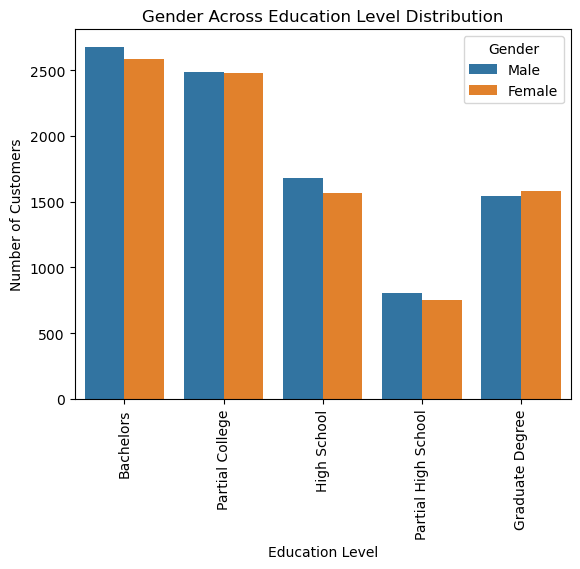

In [35]:
sns.countplot(x = 'EducationLevel', hue= 'Gender', data = data)
plt.title('Gender Across Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Number of Customers')
plt.xticks(rotation=90)

14. Use a line chart to depict the average number of TotalChildren across different income ranges.

In [274]:
data.groupby(['AvgTotalChildren', 'AnnualIncome']).size().reset_index()

,AvgTotalChildren,AnnualIncome,0
0,1,10000,1135
1,1,20000,1745
2,1,30000,2236
3,1,40000,2688
4,1,50000,661
5,1,60000,3072
6,1,70000,2313
7,1,80000,1325
8,1,90000,830
9,1,100000,559


C:\Users\Huleb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Huleb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Annual Income')

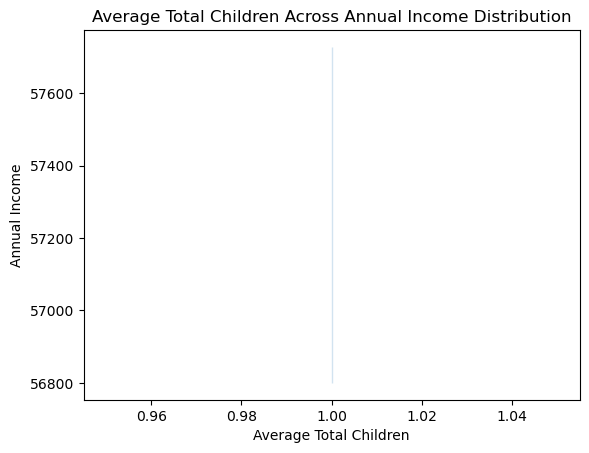

In [37]:
sns.lineplot(data = data, x = 'AvgTotalChildren', y = 'AnnualIncome')
plt.title('Average Total Children Across Annual Income Distribution')
plt.xlabel('Average Total Children')
plt.ylabel('Annual Income')


15. Generate a column chart that illustrates the count of customers by HomeOwner status for each MaritalStatus

In [280]:
data.groupby(['HomeOwner', 'MaritalStatus']).size().reset_index()

,HomeOwner,MaritalStatus,0
0,N,Married,1816
1,N,Single,4072
2,Y,Married,8001
3,Y,Single,4259


Text(0, 0.5, 'Number of Customers')

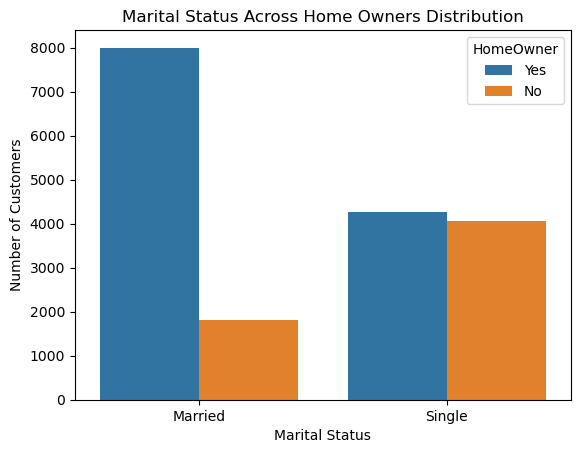

In [42]:
sns.countplot(x = 'MaritalStatus', hue = 'HomeOwner', data = data)
plt.title('Marital Status Across Home Owners Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Number of Customers')

16. Visualize the distribution of customers' birth months using a bar chart (Extract month from BirthDate).

In [331]:
data['BirthMonth'].value_counts().reset_index()

,BirthMonth,count
0,October,1740
1,March,1679
2,May,1664
3,August,1659
4,April,1655
5,February,1652
6,November,1641
7,June,1629
8,September,1610
9,July,1554


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'April'),
  Text(1, 0, 'May'),
  Text(2, 0, 'August'),
  Text(3, 0, 'February'),
  Text(4, 0, 'July'),
  Text(5, 0, 'November'),
  Text(6, 0, 'January'),
  Text(7, 0, 'June'),
  Text(8, 0, 'October'),
  Text(9, 0, 'March'),
  Text(10, 0, 'September'),
  Text(11, 0, 'December')])

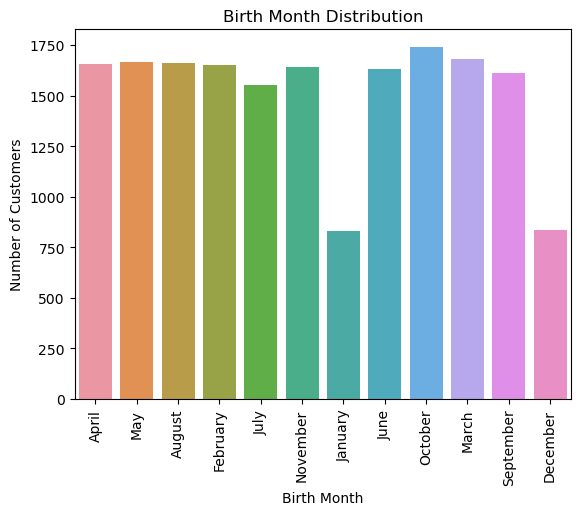

In [46]:
sns.countplot(x = 'BirthMonth', data = data)
#data['BirthMonth'].value_counts().plot(kind = 'bar')
plt.title('Birth Month Distribution')
plt.xlabel('Birth Month')
plt.ylabel('Number of Customers')
plt.xticks(rotation=90)

17. Create a pie chart to represent the proportion of customers by Occupation within a specific income range.

In [333]:
data.groupby(['Occupation','AnnualIncome']).size().reset_index()

,Occupation,AnnualIncome,0
0,Clerical,10000,84
1,Clerical,20000,510
2,Clerical,30000,1388
3,Clerical,40000,877
4,Management,40000,126
5,Management,50000,128
6,Management,60000,420
7,Management,70000,420
8,Management,80000,359
9,Management,90000,187


(array([], dtype=float64), [])

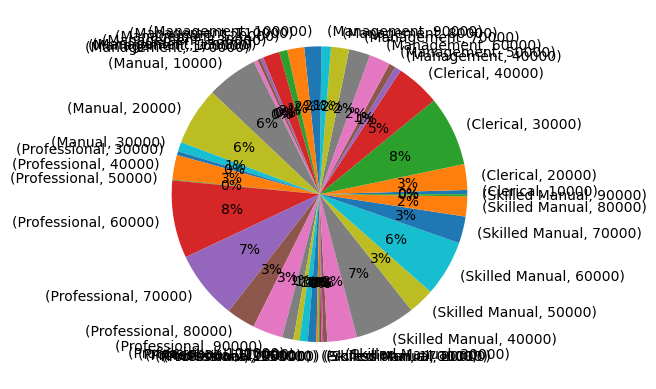

In [337]:
data.groupby(['Occupation','AnnualIncome']).size().plot(kind='pie', autopct='%.0f%%')
plt.title('Occupation Across Income Range Distribution')


18. Use a bar chart to show the frequency of each EducationLevel category.

In [338]:
data.EducationLevel.value_counts().reset_index()

,EducationLevel,count
0,Bachelors,5261
1,Partial College,4966
2,High School,3241
3,Graduate Degree,3125
4,Partial High School,1555


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Bachelors'),
  Text(1, 0, 'Partial College'),
  Text(2, 0, 'High School'),
  Text(3, 0, 'Partial High School'),
  Text(4, 0, 'Graduate Degree')])

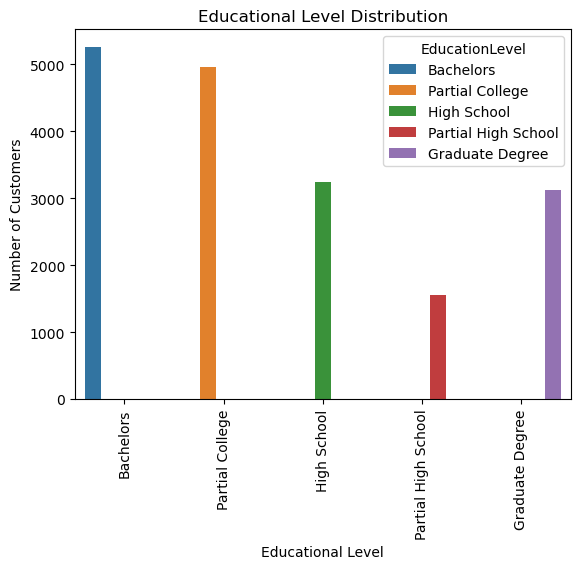

In [44]:
sns.countplot(x = 'EducationLevel', data = data, hue = 'EducationLevel')
plt.title('Educational Level Distribution')
plt.xlabel('Educational Level')
plt.ylabel('Number of Customers')
plt.xticks(rotation=90)